In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf

plt.style.use('seaborn-white')

In [2]:
temp_df = pd.read_csv('temp_clean.csv', index_col=0, parse_dates=True)
temp_df

,temperature_C
DATE,
1876-01-01,2.2
1876-01-02,2.5
1876-01-03,0.3
1876-01-04,-5.8
1876-01-05,-9.8
...,...
2022-03-26,9.4
2022-03-27,9.7
2022-03-28,10.8


In [11]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53415 entries, 1876-01-01 to 2022-03-30
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature_C  53415 non-null  float64
dtypes: float64(1)
memory usage: 2.8 MB


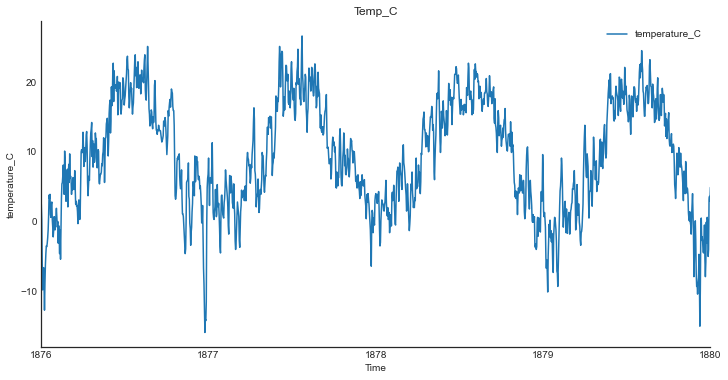

In [3]:
temp_df['1876-01-01':'1880-01-01'].plot(
    figsize=(12, 6),
    title='Temp_C',
    ylabel='temperature_C',
    xlabel='Time'
)
sns.despine()

## Making our time series **STATIONARY**

<AxesSubplot:xlabel='    DATE'>

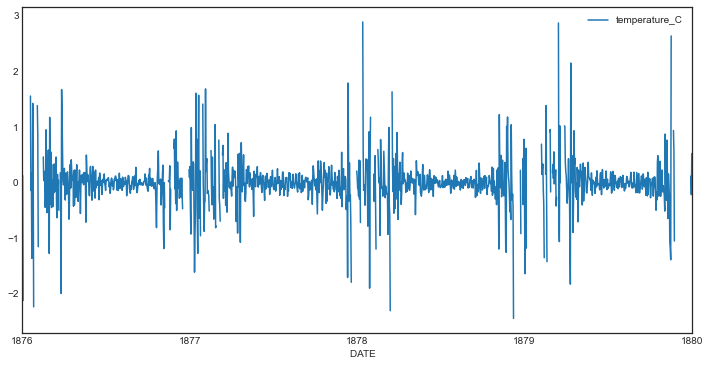

In [4]:
np.log(temp_df['1876-01-01':'1880-01-01']).diff(1).plot(figsize=(12, 6))

In [8]:
np.mean(np.log(temp_df.diff(1)))

temperature_C   -inf
dtype: float64

In [9]:
np.mean(temp_df.diff(1))

temperature_C    0.000058
dtype: float64

In [10]:
arima = pm.AutoARIMA(
    m=1,              # seasonality cycle
    d=1,               # apply differences
    D=1,               # apply seasonal difference
    maxiter=10000,
    seasonal=True
)

arima.fit(temp_df)
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                53415
Model:               SARIMAX(1, 1, 2)   Log Likelihood             -119932.230
Date:                Fri, 29 Apr 2022   AIC                         239872.460
Time:                        16:01:39   BIC                         239908.003
Sample:                             0   HQIC                        239883.559
                              - 53415                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6104      0.008     79.606      0.000       0.595       0.625
ma.L1         -0.6395      0.008    -80.375      0.000      -0.655      -0.624
ma.L2         -0.2136      0.005    -44.605      0.000      -0.223      -0.204
sigma2         5.2215      0.028    186.399      0.000       5.167       5.276
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1242.44
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.06
Prob(H) (two-sided):                  0.95   Kurtosis:                         3.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Forecasting

ValueError: operands could not be broadcast together with shapes (4,) (12,) 

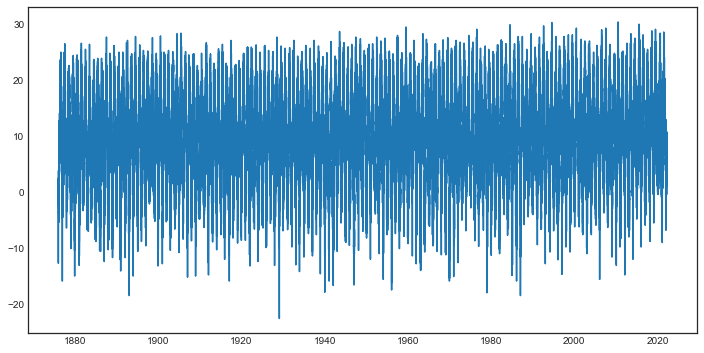

In [13]:
# forecast for the next 5 years with uncertainty area
y_forecast, ci = arima.predict(n_periods=12, return_conf_int=True)

# create some date values for the forecast horizon
index_vals = pd.date_range('2022-03-31', '2022-07-3', freq='MS')

## link for aliases: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases


plt.figure(figsize=(12,6))
plt.plot(temp_df.index.values, temp_df.values)
plt.fill_between(index_vals.values, ci[:,0], ci[:, 1], alpha=0.7, color='lightgrey', label='95% CI')
plt.plot(index_vals.values, y_forecast, label='Temperature Forecast', marker='.')
sns.despine()
plt.legend()